In [1]:
import cv2
import numpy as np
import os
import pytesseract 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print(cv2.__version__)


4.5.2


In [3]:
def plotimage(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize = [15,15])
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1,cmap = "gray")
    ax1.set(xticks=[], yticks=[], title = title1)
    
    ax2 = fig.add_subplot(122)
    ax2.imshow(img2,cmap = "gray")
    ax2.set(xticks=[], yticks=[], title = title2)

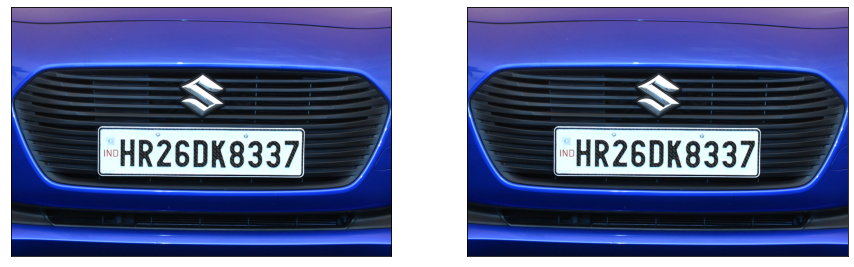

In [4]:
path = "./Nmpt.jpg"
image = cv2.imread(path)
plotimage(image,image)

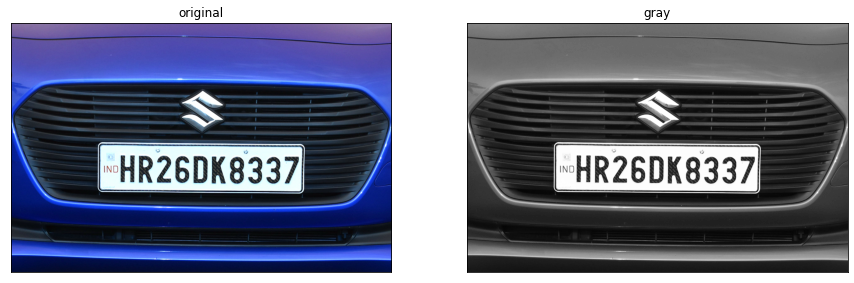

In [5]:
gray= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plotimage(image, gray, title1="original", title2="gray")

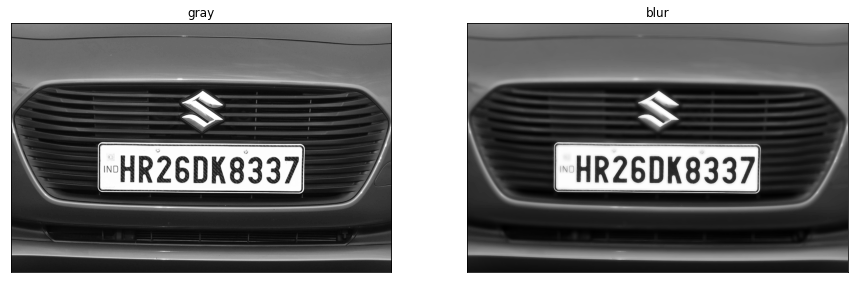

In [6]:
blur = cv2.bilateralFilter( gray, 11, 90, 90)
plotimage(gray , blur , title1="gray", title2="blur")


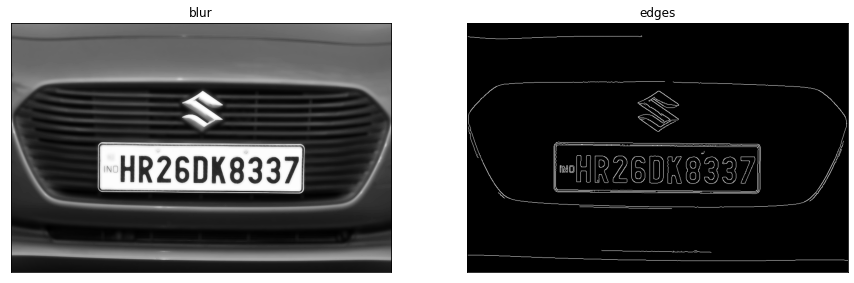

In [7]:
edges = cv2.Canny(blur , 30 , 200)
plotimage(blur , edges , title1="blur", title2="edges")

In [8]:
cnts , new = cv2.findContours(edges.copy(), cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

In [9]:
image_copy = image.copy()


In [10]:
_ = cv2.drawContours( image_copy , cnts , -1, (255,0,255) , 2)

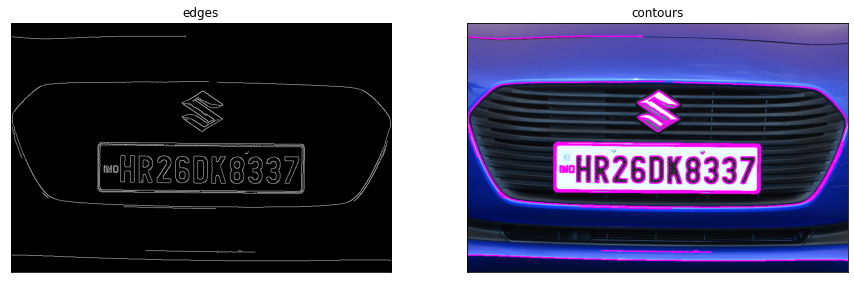

In [11]:
plotimage( edges , image_copy, title1= "edges", title2="contours")

In [12]:
print(len(cnts))

72


In [13]:
cnts = sorted(cnts , key = cv2.contourArea, reverse = True)[:30]

30


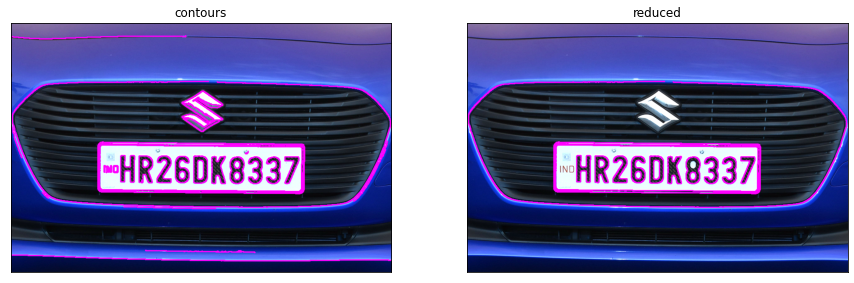

In [14]:
image_reduced_cnts = image.copy()
_ = cv2.drawContours( image_reduced_cnts , cnts , -1, (255,0,255) , 2)
plotimage( image_copy, image_reduced_cnts, title1= "contours" , title2="reduced")
print(len(cnts))

In [15]:
plate = None
for c in cnts:
    perimeter = cv2.arcLength(c, True)
    edges_count =  cv2.approxPolyDP(c, 0.02*perimeter, True)
    if len(edges_count) == 4:
        x,y,w,h = cv2.boundingRect(c)
        plate = image[y:y+h,x:x+w]
        break
        
cv2.imwrite("plate1.png", plate)

True

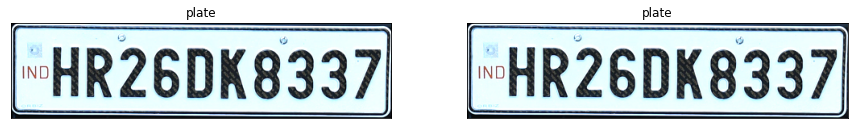

In [16]:
plotimage( plate , plate, title1= "plate", title2= "plate")

In [17]:
pytesseract.pytesseract.tesseract_cmd=r"C:\Program Files\Tesseract-OCR\tesseract.exe"
text = pytesseract.image_to_string(plate, lang = "eng")
text = ''.join(e for e in text if e.isalnum())
print(text)
type(text)
list(text)
print()
v1 = ""
v2 = ""
for x in text:
    if text.index(x) < 6:
        v1 = v1+x
    else:
        v2 = v2+x
        
print(v1)
print(v2)

HR26DK8337

HR26DK
8337


In [ ]:
import sys
import requests
from bs4 import BeautifulSoup, SoupStrainer

home_url = 'https://parivahan.gov.in/rcdlstatus/?pur_cd=102'
post_url = 'https://parivahan.gov.in/rcdlstatus/vahan/rcDlHome.xhtml'

first = v1

second = v2
r = requests.get(url=home_url)
cookies = r.cookies
soup = BeautifulSoup(r.text, 'html.parser')

button = soup.find("button",{"type": "submit"})
viewstate = soup.select('input[name="javax.faces.ViewState"]')[0]['value']

data = {
    'javax.faces.partial.ajax':'true',
    'javax.faces.source': 'form_rcdl:j_idt59',
    'javax.faces.partial.execute':'@ALL',
    'javax.faces.partial.render': 'form_rcdl:pnl_show form_rcdl:pg_show form_rcdl:rcdl_pnl',
     button['id']:button['id'],
    'form_rcdl:j_idt59':'form_rcdl:j_idt59',
    'form_rcdl':'form_rcdl',
    'form_rcdl:tf_reg_no1': first,
    'form_rcdl:tf_reg_no2': second,
    'javax.faces.ViewState': viewstate,
}

r = requests.post(url=post_url, data=data, cookies=cookies)
soup = BeautifulSoup(r.text, 'html.parser')
table = SoupStrainer('tr')
soup = BeautifulSoup(soup.get_text(), 'html.parser', parse_only=table)
soup.get_text()